* <font color=blue>Course: IST 718 </font> 
* <font color=blue>Authors: Sathish Kumar Rajediran</font> 
* <font color=blue>Task: Lab 2</font> 
* <font color=blue> Task Item:</font><font color=green> __*Best Zipcode Recommendation to Invest based on average household value*__</font> 
* <font color=blue>Date: May 9,2021</font> 

***

In [1]:
!pip install --upgrade setuptools

Requirement already up-to-date: setuptools in /usr/local/envs/py3env/lib/python3.5/site-packages (50.3.2)


In [2]:
import datetime
import time

starttime = time.time()

s1 = datetime.datetime.now()
print ("Start date and time:", s1.strftime("%Y-%m-%d %H:%M:%S"))

!conda install -y fbprophet

s2 = datetime.datetime.now()
print ("End date and time:", s2.strftime("%Y-%m-%d %H:%M:%S"))

print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

Start date and time: 2021-05-16 01:43:03
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

End date and time: 2021-05-16 01:44:04
...runtime: 1.01 minutes


In [1]:
# s2-s1


<img src="Syracuse-real-estate.jpeg"  title="Syracuse, NY Real Estate Market" />




## Objective
 
This case study provides an opportunity to demonstrate our ability to combine datasets and produce meaningful analysis. Specifically, we would like to provide a decision maker with more than just data—we want to provide insights, understanding, and wisdom. This exercise allows the student an opportunity to demonstrate progress (or mastery) of learning objectives 1, 2, 3, 4, and 5.
* 1) Bold: Obtain data and understand data structures and data elements.
* 2) Scrub data using scripting methods, to include debugging, for data manipulation in R and other tools.
* 3) Explore data using essential qualitative analysis techniques, including descriptive statistics.
* 4) Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users.
* 5) Interpret the data, model, analysis, and findings, and communicate the results in a meaningful way.


## Instructions
*  The research question is can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?
*  Using the base data available from Zillow   (files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)
   * Review the data – clean as appropriate
   * Provide an initial data analysis to include (but not limited to):
     * Develop time series plots for the following Arkansas metro areas:
        * Hot Springs, Little Rock, Fayetteville, Searcy
        * Present all values from 1997 to present
        * Average at the metro area level
* Using data from Zillow:
   * Develop model(s) for forecasting average median housing value by zip code for 2018
   * Use the historical data from 1997 through 2017 as your training data
   * Integrate data from other sources (think Bureau of Labor Statistics and Census data) to improve upon your base model(s)
* Answer the following questions:
   * What technique/algorithm/decision process did you use to down sample? (BONUS FOR NOT DOWN SAMPLING)
   * What three zip codes provide the best investment opportunity for the SREIT?
   * Why?
* Bonus: Develop a geographic visualization that in your view best depicts the data and recommendations:
   * By state
   * Median housing for Dec (state average)

## Additional Instructions
* Don’t forget what you learned in your previous courses; do your own work, document any assistance, use comments for clarity.
* Use python to conduct your analysis and produce your graphics

## Submission Items
* Report with graphics
* Supporting notebook for the report with final data set

***

## Loading and Cleaning the Data

***

In [4]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
import datetime
import time
import timeit
import warnings
import random
warnings.filterwarnings("ignore")

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import itertools
import types
import math

# Import required packages for time series and model summary

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

# from scipy.stats import uniform  # for training-and-test split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# from  multiprocessing import Pool, cpu_count

#Visualization packages
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


print('Libraries imported successfully!\n')
os.getcwd()


Libraries imported successfully!



'/content/datalab/TimeSeries'

In [5]:
pwd

'/content/datalab/TimeSeries'

In [6]:
ls

AirPassengers.csv             us-county-boundaries.csv
fs11_gpci_by_msa-zip.csv      us-county-boundaries.dbf
GeoMaps.ipynb                 us-county-boundaries.geojson
Lab 2 Project-Copy1.ipynb     us-county-boundaries.json
Lab 2 Project.ipynb           us-county-boundaries.prj
prophet_train.py              us-county-boundaries.shp
__pycache__/                  us-county-boundaries.shx
Rajendiran_Lab2-Copy1.ipynb   us-county-boundaries.xls
Rajendiran_Lab2.ipynb         Zestimate.ipynb
Rajendiran_Week6_Async.ipynb  Zip_Zhvi_SingleFamilyResidence.csv
Syracuse-real-estate.jpeg     Zip_Zhvi_SingleFamilyResidence_sam.csv
train_results.csv             Zip_Zhvi_SingleFamilyResidence_simple.csv


In [7]:
# # Show all columns and do not truncate in the data frame
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

## Pre-Processing

#### Obtain & Scrub the data
1. Data set containing data for every city in the U.S. plus average household value between the periods of Januray, 1996 and March, 2020. 
2. Data set containing zip codes for every metropolitan area in the U.S.  

In [122]:
# ***********************************************************************************
#       Working with files  
# ***********************************************************************************

# Read the csv files into dataframes

# !pwd

# fpath = "/Users/sathishrajendiran/ist718-python/Labs/Lab2/"
fpath = "/content/datalab/TimeSeries/"

try: 
    zipdata = pd.read_csv(fpath + "Zip_Zhvi_SingleFamilyResidence.csv", encoding='ISO-8859-1')
    print('zipdata data - Total Number of rows Processed: ',len(zipdata))
except:
    print("Is the file in correct directory?")


zipdata data - Total Number of rows Processed:  30464


In [ ]:
# print(zipdata.info())

In [ ]:
# zipdata.head()

In [11]:
#Lets start with data until December, 2019; Remaining months will be included in the later part
zipdata = zipdata.iloc[:, 0:297]

In [ ]:
# summary statistics
summary = zipdata.describe()
summary.head()

##### Remove NAs 
1. Most of the metro sections values are NAs (7144). Lets replace these NAs from using public dataset containing Metro Names by Zipcode + City and County level


In [ ]:
# Missing values
na_values = zipdata.isna().sum()
# print(na_values)

In [14]:
# zipdata[zipdata['Metro'].isna()]

In [15]:
# ***********************************************************************************
#       Working with files  
# ***********************************************************************************

# Read the csv files into dataframes

# !pwd

# fpath = "/Users/sathishrajendiran/ist718-python/Labs/Lab2/"

try: 
    msazip = pd.read_csv(fpath + "fs11_gpci_by_msa-zip.csv")
    print('msazip data - Total Number of rows Processed: ',len(msazip))
except:
    print("Is the file in correct directory?")

msazip data - Total Number of rows Processed:  43772


In [ ]:
print(msazip.info())

In [ ]:
# msazip.shape

In [18]:
# Keep data with missing metro name. 
missing_metro = zipdata[zipdata['Metro'].isna()]
missing_index = missing_metro.index

# Drop observation without Metro data. These observations will then be reattached
df_metro_complete = zipdata.drop(index=missing_index)

# Keep zip code and msa name from the metro_area data set
metro_area_simp = msazip[['ZIP CODE', 'MSA Name']]

# Merge missing metro with metro_area_simp 
metro_complete = missing_metro.merge(metro_area_simp, how='left', left_on='RegionName', right_on='ZIP CODE')

In [ ]:
# metro_complete.shape

In [ ]:
# metro_area_simp.head()

In [ ]:
# metro_complete.head()


In [ ]:
# Check to see that there are no NaN variables in the new column. 
print(metro_complete['MSA Name'].isna().sum())

# There are no NaN values now. We'll now replace the Metro column with the MSA Name column, drop the overlapping columns, and 
# reattach the observations to the df_data_1 data set. 
metro_complete['Metro'] = metro_complete['MSA Name']


In [ ]:
# metro_complete.head()

In [24]:
metro_complete1 = metro_complete.iloc[:, 0:297]
metro_complete1.head()

,RegionID,RegionName,RegionType,StateName,State,City,Metro,CountyName,SizeRank,1996-01,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,58148,926,Zip,LA,LA,Zwolle,San Juan-Caguas-Guaynabo,Sabine Parish,15,NaN,...,103444,104314,104318,103966,103633,103125,102581,102384,102502,102663
1,58011,612,Zip,MI,MI,Frederic,San Juan-Caguas-Guaynabo,Crawford County,902,NaN,...,124844,126730,128471,129738,129190,127661,126351,125146,124569,123821
2,58069,727,Zip,AR,AR,Walnut Ridge,San Juan-Caguas-Guaynabo,Lawrence County,1341,NaN,...,89964,90545,91114,91324,91745,91521,91633,92007,92444,92555
3,70178,28734,Zip,NC,NC,Franklin,NC NONMETROPOLITAN AREA,Macon County,2724,78118.0,...,168915,169177,169542,169938,170354,170693,171058,171345,171499,171068
4,91865,77351,Zip,TX,TX,West Livingston,TX NONMETROPOLITAN AREA,Polk County,3043,NaN,...,130289,130916,131408,131885,132441,133215,133926,134508,134796,135063


In [ ]:
# Reattach data to original data. 
zipdata = df_metro_complete.append(metro_complete1)
print(zipdata.shape)
print(zipdata.info())

In [ ]:
# zipdata.head()

In [27]:
# Missing values
na_values = zipdata.isna().sum()
# print(na_values)

In [28]:
# zipdata.iloc[:, 9:].head()

In [ ]:
s1 = datetime.datetime.now()
print ("Start date and time:", s1.strftime("%Y-%m-%d %H:%M:%S"))


# Obtain column names of year-month combinations. 
year_month = zipdata.iloc[:, 9:].columns.values

df_data_2 = zipdata

# Iterate over year-month combination, replacing NaN with average value for metropolitan area 
for ym in df_data_2[year_month]:
    df_data_2[ym] = df_data_2.groupby('Metro')[ym].transform(lambda x: x.fillna(x.mean()))
    
s2 = datetime.datetime.now()
print ("End date and time:", s2.strftime("%Y-%m-%d %H:%M:%S"))


In [ ]:
# df_data_2.tail()

In [ ]:
# df_data_2.shape

In [ ]:
# df_data_2.describe()

In [33]:
# Columns that want to be kept
to_keep = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

# Columns to be converted to observations
to_obs = df_data_2.iloc[:, 9:]

# Pivot the data to have on observation for each region for each year-month. 
df_data_pivot = pd.pivot_table(df_data_2, values=to_obs, columns=to_keep)

# Reset the index and rename year-month and values columns for easy identification.
df_data_pivot = df_data_pivot.reset_index()
df_data_pivot.rename(columns={'level_0':'date', 0:'value'}, inplace=True)

# Convert data column to datetime 
df_data_pivot['date'] = pd.to_datetime(df_data_pivot['date'], infer_datetime_format=True)

# Print first five rows
df_data_pivot.sort_values(['RegionID', 'date']).head()

/usr/local/envs/py3env/lib/python3.5/site-packages/dateutil/parser/__init__.py:47: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


,date,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
0,1996-01-01,58001,501,Holtsville,NY,New York-Newark-Jersey City,Suffolk County,30440,224819.160194
30464,1996-02-01,58001,501,Holtsville,NY,New York-Newark-Jersey City,Suffolk County,30440,224932.313253
60928,1996-03-01,58001,501,Holtsville,NY,New York-Newark-Jersey City,Suffolk County,30440,224601.087952
91392,1996-04-01,58001,501,Holtsville,NY,New York-Newark-Jersey City,Suffolk County,30440,223958.222892
121856,1996-05-01,58001,501,Holtsville,NY,New York-Newark-Jersey City,Suffolk County,30440,224125.732852


In [ ]:
 list(df_data_pivot.columns.values)

In [ ]:
# df_data_pivot.head()

In [36]:
# df_data_2.iloc[:, 9:]

In [ ]:
# Check the size of the data. 
# print(df_data_pivot.shape)

# Check each columns data type so that there aren't any mismatched types (i.e RegionID should be an object, not o number)
# print(df_data_pivot.dtypes)

# RegionID and Region name are identification tags and should therefore be objects. SizeRank is an ordinal value and should also be converted to an object
df_data_pivot['RegionID'] = df_data_pivot['RegionID'].astype(object)
df_data_pivot['RegionName'] = df_data_pivot['RegionName'].astype(object)
df_data_pivot['SizeRank'] = df_data_pivot['SizeRank'].astype(object)

In [38]:
# Print the first and last date of the data 
print('Oldest observation: ', df_data_pivot['date'].min())
print('Newest observation: ', df_data_pivot['date'].max(), '\n')

# Print the number of unique states, cities, and zipcodes
print('Number of states: ', len(df_data_pivot['State'].unique()))
print('Number of cities: ', len(df_data_pivot['City'].unique()))
print('Number of zipcodes: ', len(df_data_pivot['RegionID'].unique()))

Oldest observation:  1996-01-01 00:00:00
Newest observation:  2019-12-01 00:00:00 

Number of states:  51
Number of cities:  14862
Number of zipcodes:  30464


In [ ]:
# Sort the data by state and print the unique values as an array. 
df_data_pivot.sort_values('State')['State'].unique()

## Exploratory Analysis
***

> Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. — > John Tukey</cite>

          date      avg_value
155 2008-12-01  188688.365757
156 2009-01-01  187228.194062
157 2009-02-01  186042.240772
158 2009-03-01  184870.897173
159 2009-04-01  183624.110633


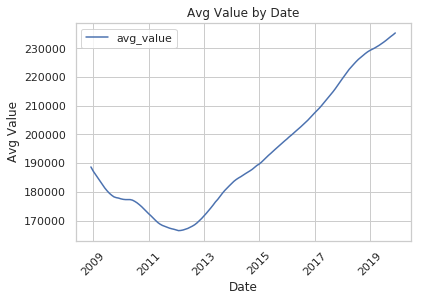

In [112]:
# Create a new data frame to average value per date. Keep observations starting from December 2008 to plot. 
national = df_data_pivot.groupby('date')['value'].mean()
national = national.reset_index()
national.columns = ['date', 'avg_value']
national = national[national['date']>='2008-12-01']
print(national.head())

# Plot the data as a line plot.
# Enlarge the plot
plt.figure(figsize=(12,9))
national.plot(x='date', y='avg_value')
_ = plt.xlabel('Date')
_ = plt.ylabel('Avg Value')
_ = plt.title('Avg Value by Date')
# Rotate x-labels
plt.xticks(rotation=45)
plt.show()


        date      avg_value
0 1996-01-01  112527.568630
1 1996-02-01  112327.604581
2 1996-03-01  112358.491573
3 1996-04-01  113714.942722
4 1996-05-01  113733.305915


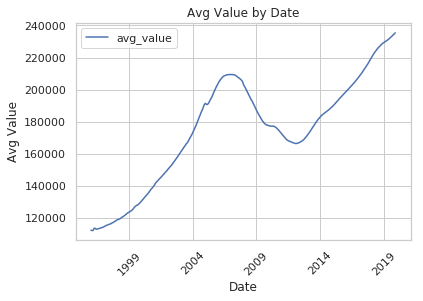

In [123]:
# Create a new data frame to average value per date. Keep observations starting from January 21996008 to plot. 
national_all = df_data_pivot.groupby('date')['value'].mean()
national_all = national_all.reset_index()
national_all.columns = ['date', 'avg_value']
national_all = national_all[national_all['date']>='1996-01-01']
print(national_all.head())

# Plot the data as a line plot.
# Enlarge the plot
plt.figure(figsize=(20,12))
national_all.plot(x='date', y='avg_value')
_ = plt.xlabel('Date')
_ = plt.ylabel('Avg Value')
_ = plt.title('Avg Value by Date')
# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

 > As this graph presents, between 1996 and 2020 - US real estate market has seen twice hitting the roof and once had downfall. Yes, the downfall was due to the recession that hit the US in late 2008 and lasted until 2012. Ever since the market has been on the rise. Lets look at state level if the story is true across.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

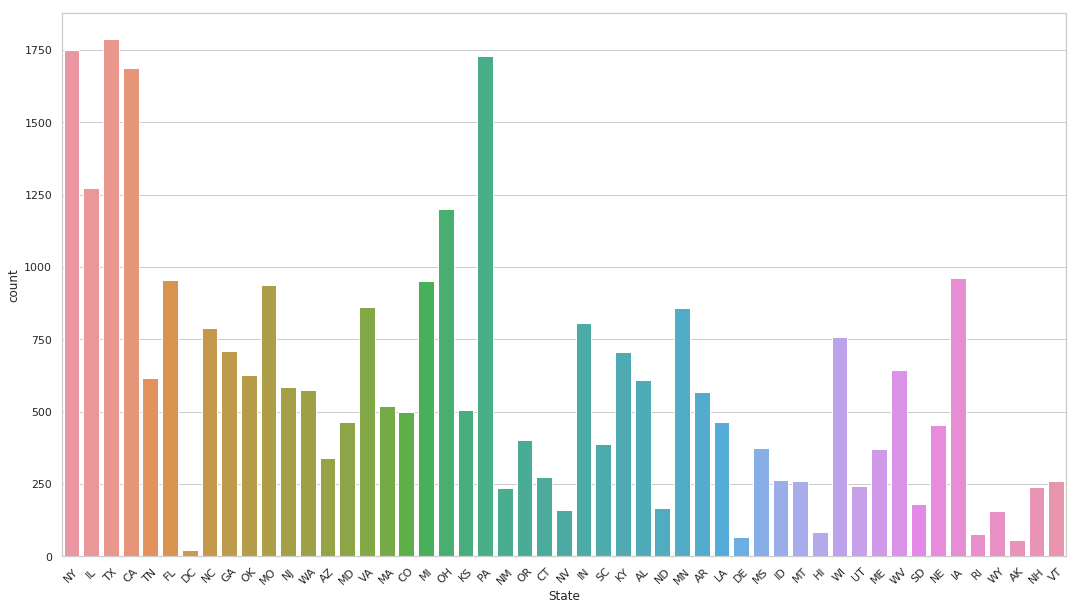

In [114]:
# Enlarge the plot
plt.figure(figsize= (18,10))
sns.set(style = 'whitegrid') 
sns.countplot(df_data_2['State']) 

# Rotate x-labels
plt.xticks(rotation=45)

        date state      avg_value
0 1996-01-01    AK  152514.153846
1 1996-01-01    AL   92708.648153
2 1996-01-01    AR   54911.793080
3 1996-01-01    AZ  118824.561143
4 1996-01-01    CA  193902.496039


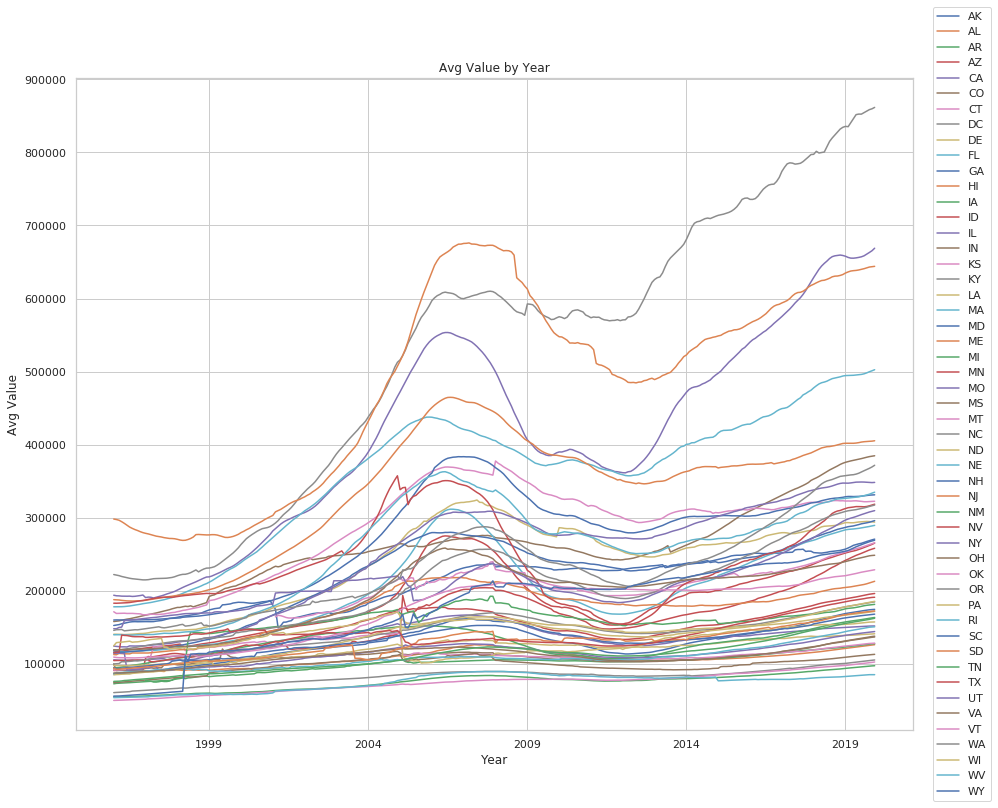

In [42]:
# Create a new data frame starting from December 2008 but looking at values at the state level
state = df_data_pivot.groupby(['date', 'State'])['value'].mean()
state = state.reset_index()
state.columns = ['date', 'state', 'avg_value']
state = state[state['date']>='1996-01-01']
print(state.head())

# Pivot the data frame to produce multiple line plots
state_df = state.pivot(index='date', columns='state', values='avg_value')

# Plot the data
state_df.plot(figsize=(15,12))
_ = plt.xlabel('Year')
_ = plt.ylabel('Avg Value')
_ = plt.title('Avg Value by Year')
plt.legend(loc='center right', bbox_to_anchor=[1.1, 0.5])
plt.show()

> Hmmm, Intresting. Its a fact that the real estate pricing has been on the rise after 2012, but the average increase is not consistent across states.Legends on the map is very helpful.But, There are atleast 4 states (DC, CA, HI, MA and NJ) with average price has increased by 400,000 by 2020.

In [43]:
# Retain observations for December 2019. Then filter states with values above 350,000
dec_2019 = state[state['date']=='2019-12-01']
top_three = dec_2019[dec_2019['avg_value']>=350000]

print(top_three[['state', 'avg_value']].sort_values('avg_value', ascending=False))

      state      avg_value
14644    DC  861657.272727
14641    CA  668897.169431
14648    HI  644084.440476
14656    MA  502607.244701
14668    NJ  405352.664384
14642    CO  384815.366733
14684    WA  371799.055749


           date state      avg_value  pct_change
1173 1997-12-01    AK  163082.615385    0.033684
1785 1998-12-01    AK  172434.384615    0.057344
2397 1999-12-01    AK  184291.785714    0.068765
3009 2000-12-01    AK  186616.357143    0.012614
3621 2001-12-01    AK  165166.028061   -0.114943


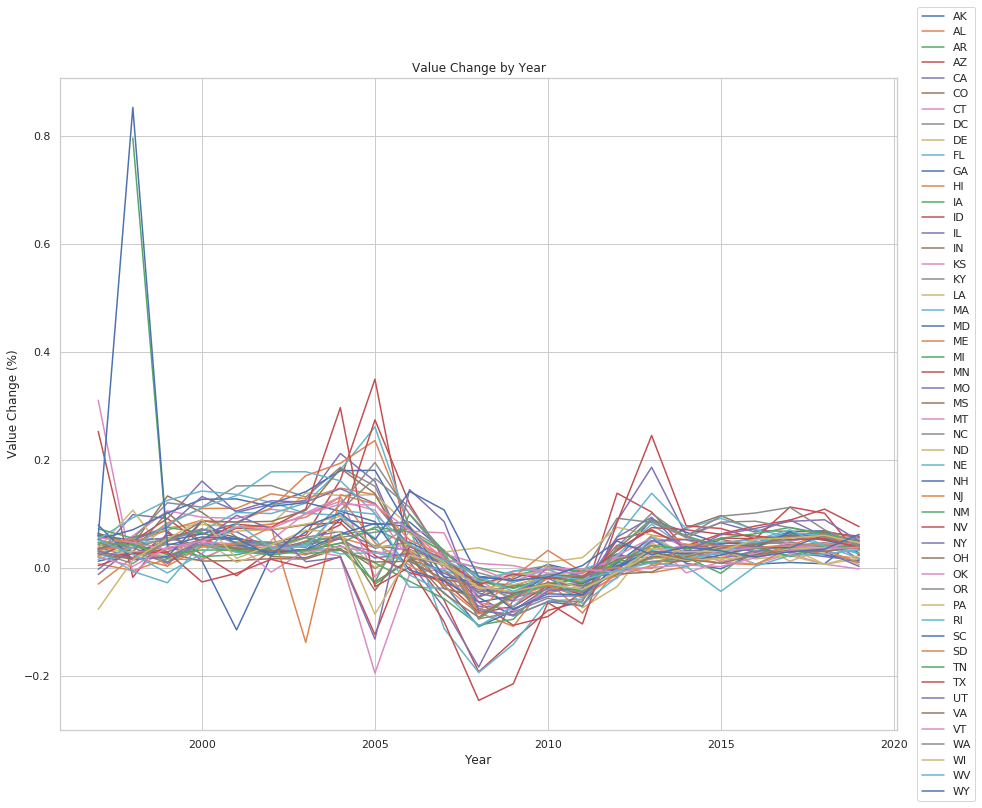

In [44]:
# Identify December observations
dec_obs = state['date'].map(lambda x: x.month) == 12
state_dec = state[dec_obs]

# Calculate value percentage change for each state 
state_dec['pct_change'] = state_dec['avg_value'].div(state_dec.groupby('state')['avg_value'].shift(1))-1
state_dec = state_dec.dropna()
print(state_dec.sort_values(['state', 'date']).head()) 

# Plot the percentage changes for each state. 
state_pct_df = state_dec.pivot(index='date', columns='state', values='pct_change')

# Plot the data
state_pct_df.plot(figsize=(15,12))
_ = plt.xlabel('Year')
_ = plt.ylabel('Value Change (%)')
_ = plt.title('Value Change by Year')
plt.legend(loc='center right', bbox_to_anchor=[1.1, 0.5])
plt.show()

In [ ]:
# state_pct_df

In [46]:
dec_2019_pct = state_dec[state_dec['date']=='2019-12-01']
pct_10 = dec_2019_pct[dec_2019_pct['pct_change']>0.05]
print(pct_10[['state', 'pct_change']].sort_values('pct_change', ascending=False))

      state  pct_change
14650    ID    0.076262
14687    WY    0.062020
14640    AZ    0.058550
14637    AK    0.057055
14652    IN    0.054363
14663    MT    0.053716
14666    NE    0.051060
14679    TN    0.050108


In [47]:
print(pct_10[['state', 'pct_change']].sort_values('pct_change', ascending=True))

      state  pct_change
14679    TN    0.050108
14666    NE    0.051060
14663    MT    0.053716
14652    IN    0.054363
14637    AK    0.057055
14640    AZ    0.058550
14687    WY    0.062020
14650    ID    0.076262


In [48]:
# Filter the data, keeping only that for Florida and it's metro area. 
florida = df_data_pivot[df_data_pivot['State'] == 'FL']
florida.head()

,date,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
1232,1996-01-01,59738,4956,Pensacola,FL,Pensacola-Ferry Pass-Brent,Escambia County,23350,94609.0
9751,1996-01-01,71730,32003,Fleming Island,FL,Jacksonville,Clay County,4340,146152.0
9752,1996-01-01,71734,32008,Branford,FL,FL NONMETROPOLITAN AREA,Suwannee County,12313,42010.0
9753,1996-01-01,71735,32009,Bryceville,FL,Jacksonville,Nassau County,16025,92317.0
9754,1996-01-01,71736,32011,Callahan,FL,Jacksonville,Nassau County,7549,74670.0


> Now, lets look at one of the states the real estates available from 1996.Yes, Florida it is. Lets zoom in on Florida around the metro areas to see what kind of an increase it had over the years.

In [ ]:
# Let's first look at how the data is distributed and how many NaN there are 
print(florida.describe())
print(len(florida))

In [ ]:
# Keep NaN observations
nan_values = florida[np.isnan(florida['value'])==True]

# Count NaN by Metro
nan_values.groupby('Metro')['Metro'].count()

In [ ]:
df_data_2[(df_data_2['Metro'] == 'Key West') | (df_data_2['Metro'] == 'Sebring')]

In [52]:
# Variation over the last five months. 
print(florida.groupby('date')['value'].describe().tail())

            count           mean            std      min        25%       50%  \
date                                                                            
2019-08-01  954.0  286674.969602  267537.750459  43665.0  169889.25  234088.0   
2019-09-01  954.0  287292.757862  267256.728534  43798.0  170512.75  234821.5   
2019-10-01  954.0  287997.615304  266955.181328  43912.0  170990.75  235835.0   
2019-11-01  954.0  288782.536688  266766.282535  43745.0  171888.50  236929.5   
2019-12-01  954.0  289521.784067  266456.124222  43958.0  172986.00  237939.5   

                  75%        max  
date                              
2019-08-01  322100.00  4614933.0  
2019-09-01  322894.00  4619772.0  
2019-10-01  323470.50  4617713.0  
2019-11-01  323913.75  4623905.0  
2019-12-01  324559.00  4625994.0  


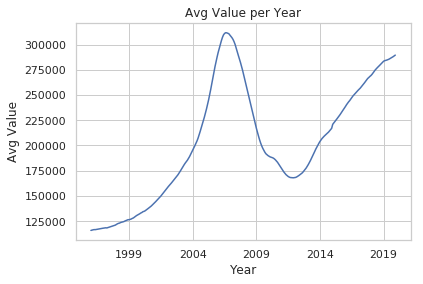

In [53]:
florida_avg = florida.groupby('date')['value'].mean()
florida_avg.plot(x='date', y='value')
_ = plt.xlabel('Year')
_ = plt.ylabel('Avg Value')
_ = plt.title('Avg Value per Year')
plt.show()

In [ ]:
# Find the top and bottom two florida metro areas, using percentage growth between 2018 and 1996. 
fl_96 = florida[florida['date']=='1996-01-01']
fl_19 = florida[florida['date']=='2019-12-01']

# Get the average household values by metro area
fl_96_avg = fl_96.groupby('Metro')['value'].mean().reset_index()
fl_19_avg = fl_19.groupby('Metro')['value'].mean().reset_index()

# Merge the two sets and find the highest percentage change
fl_96_19_avg = fl_96_avg.merge(fl_19_avg, on='Metro', how='inner')
fl_96_19_avg.columns = ['Metro', 'value_96', 'value_19']
fl_96_19_avg['Pct_change'] = (fl_96_19_avg['value_19']/fl_96_19_avg['value_96']) - 1
fl_96_19_avg.sort_values('Pct_change', ascending=False)

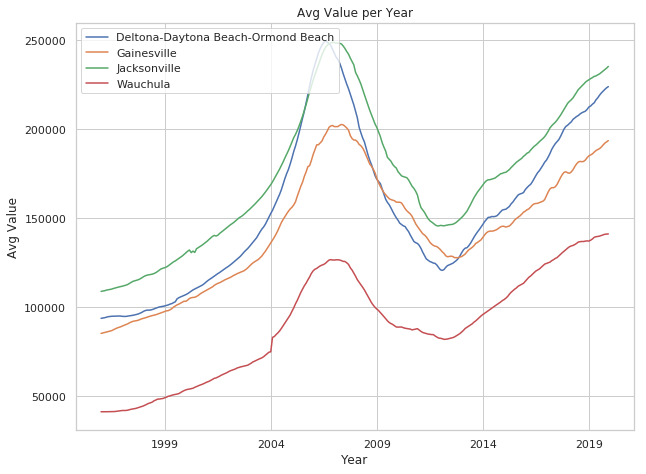

In [55]:
# Keep metro areas of Wauchula, Deltona-Daytona Beach-Ormond Beach, Gainesville, and Jacksonville
florida_metro = florida[(florida['Metro']=='Wauchula') |
                          (florida['Metro']=='Deltona-Daytona Beach-Ormond Beach') |
                          (florida['Metro']=='Gainesville') |
                          (florida['Metro']=='Jacksonville')]

# Calculate average household value of the metro areas and plot
florida_metro_avg = florida_metro.groupby(['date', 'Metro'])['value'].mean()
florida_metro_avg = florida_metro_avg.reset_index()

# Pivot the table
florida_metro_avg_pivot = florida_metro_avg.pivot(index='date', columns='Metro', values='value')

# Plot
florida_metro_avg_pivot.plot(figsize=(10,7.5))
_ = plt.xlabel('Year')
_ = plt.ylabel('Avg Value')
_ = plt.title('Avg Value per Year')
plt.legend(loc='upper left')
plt.show()

> With no surprises, recession had an impact on Florida aswell between 2008 and 2012. However, from there jacksonville and Deltona-Daytona beach-Ormand Beach metro area had seen catching up with its historical rise and alsmot 200% rise in the market. Wauchulla is steadily increasing considering its low investment cost. Risk is low as well.

## Model Building
***

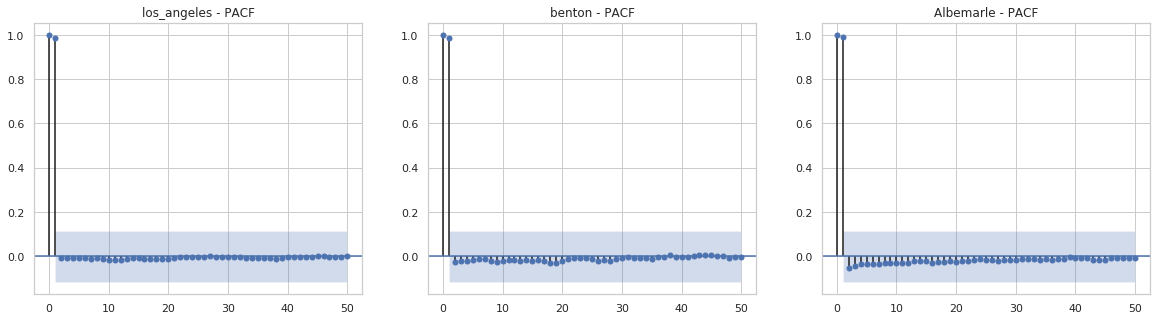

In [56]:
# Select a zip code to represent our data 
fremont = df_data_pivot[df_data_pivot['RegionName']==94536]
benton = df_data_pivot[df_data_pivot['RegionName']==72712]
los_angeles = df_data_pivot[df_data_pivot['RegionName']==90210]
Albemarle = df_data_pivot[df_data_pivot['RegionName']==22911]

# Set figure size
plt.figure(figsize=(20,5))

# Plot autocorrelation plot for 94536, 72712, 90210, and 22911 zip code to identify parameter starting point for ARIMA model

ax1 = plt.subplot(131)
plot_pacf(los_angeles.value, lags=50, ax=ax1)
_ = plt.title('los_angeles - PACF')

ax2 = plt.subplot(132)
plot_pacf(benton.value, lags=50, ax=ax2)
_ = plt.title('benton - PACF')

ax3 = plt.subplot(133)
plot_pacf(Albemarle.value, lags=50, ax=ax3)
_ = plt.title('Albemarle - PACF')


plt.show()

In [57]:
# Transforming the los_angeles subset 
los_angeles_simp = los_angeles[['date', 'value']]
los_angeles_simp = los_angeles_simp.set_index('date')

# Separate into training and test sets
sm_train = los_angeles_simp.loc[:'2018-12-01']
sm_test = los_angeles_simp.loc['2019-01-01':]

In [58]:
# sm_test

In [59]:
# Define the p, d and q parameters to take any value between 1 and 10
p = range(1, 5)
d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 0, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (2, 0, 0, 12)


In [60]:
# Run the model with the selected parameters
mod = sm.tsa.statespace.SARIMAX(sm_train,
                                order=(4, 1, 0),
                                seasonal_order=(4, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/envs/py3env/lib/python3.5/site-packages/statsmodels/tsa/statespace/sarimax.py:1042: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8144      0.191      4.265      0.000       0.440       1.189
ar.L2          0.2096      0.242      0.866      0.386      -0.265       0.684
ar.L3         -0.3910      0.256     -1.529      0.126      -0.892       0.110
ar.L4          0.3460      0.171      2.024      0.043       0.011       0.681
ar.S.L12      -1.5338      0.192     -8.000      0.000      -1.910      -1.158
ar.S.L24      -1.5872      0.351     -4.516      0.000      -2.276      -0.898
ar.S.L36      -1.0442      0.347     -3.013      0.003      -1.723      -0.365
ar.S.L48      -0.3695      0.260     -1.421      0.155      -0.879       0.140
sigma2        1.5e+08   7.33e-10   2.05e+17      0.000     1.5e+08     1.5e+08


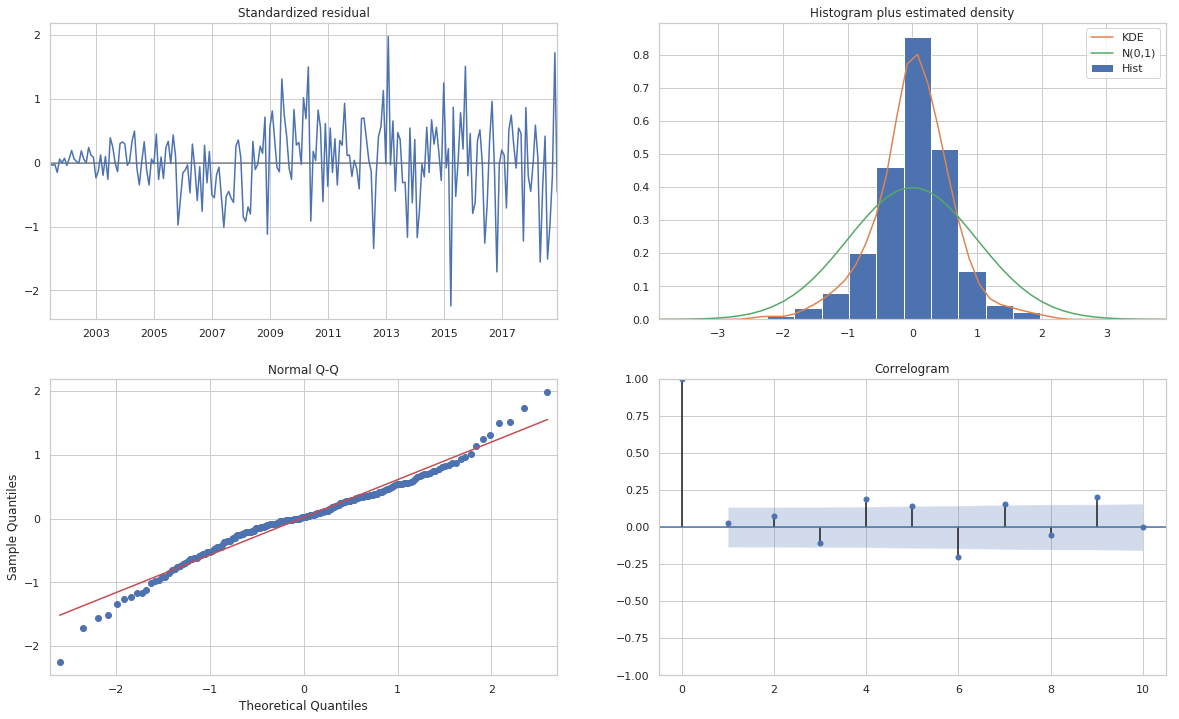

In [61]:
# Plot the model diagnostics. 
results.plot_diagnostics(figsize=(20, 12))
plt.show()

In [62]:
# Build a first validation using data from 2018 within the training set. 

s1 = datetime.datetime.now()
print ("Start date and time:", s1.strftime("%Y-%m-%d %H:%M:%S"))

pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

s2 = datetime.datetime.now()
print ("End date and time:", s2.strftime("%Y-%m-%d %H:%M:%S"))

Start date and time: 2021-05-16 01:47:32
End date and time: 2021-05-16 01:47:32


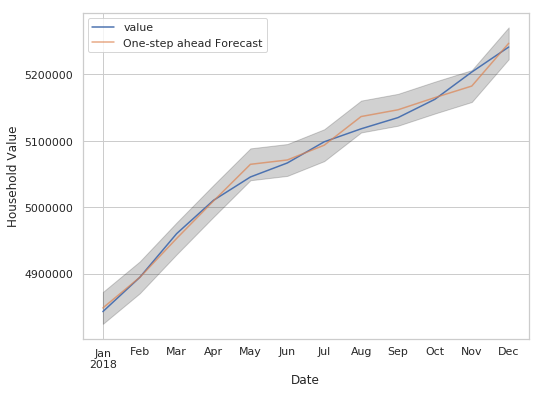

In [63]:
# Overlay the time-series plot with the predicted validation data. 
# We'll restrict showing the graphed data starting from 2000 to zoom into the time-series
ax = sm_train['2018-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8,6))

# Shade confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Household Value')
plt.legend()
plt.show()

In [64]:
# Obtain the predicted mean, merge with the actual values, and compute the MSE. 
y_forecasted = pred.predicted_mean.reset_index()
y_truth = sm_train['2000-01-01':].reset_index()

y_forecasted.columns = ['date', 'value_pred']
y_merge = y_forecasted.merge(y_truth, how='inner', on='date')

# Compute the mean square error
mae = mean_absolute_error(y_merge.value, y_merge.value_pred)
mse = mean_squared_error(y_merge.value, y_merge.value_pred)
r2 = r2_score(y_merge.value, y_merge.value_pred)

# Print the metric results. 
print('The Mean Absolute Error of our forecast is {}'.format(round(mae, 2)))
print('The Mean Squared Error of our forecast is {}'.format(round(mse, 2)))
print('The R-squared of our forecast is {}'.format(round(r2, 2)))

The Mean Absolute Error of our forecast is 8495.62
The Mean Squared Error of our forecast is 121380932.45
The R-squared of our forecast is 0.99


In [65]:
# y_merge

In [66]:
# results

In [ ]:
# Use the model to forecast fifteen months into 2018 and store the confidence intervals

s1 = datetime.datetime.now()
print ("Start date and time:", s1.strftime("%Y-%m-%d %H:%M:%S"))

forecast = results.get_prediction(start=pd.to_datetime('2018-01-01'),end=pd.to_datetime('2018-12-01'), dynamic=False)
forecast_ci = forecast.conf_int()

s2 = datetime.datetime.now()
print ("End date and time:", s2.strftime("%Y-%m-%d %H:%M:%S"))

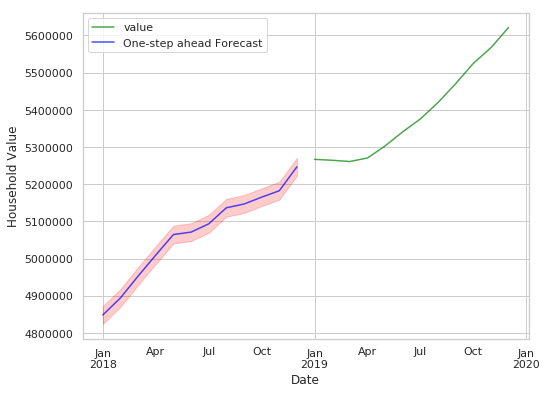

In [68]:
# Plot the actual results for 2018 vs the projected results. 
ax = sm_test['2018-01-01':].plot(label='observed',color='green', alpha=.7)
forecast.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',color='blue', alpha=.7, figsize=(8,6))

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='red', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Household Value')
plt.legend(loc='upper left')
plt.show()

In [69]:
# sm_test

In [70]:
# sm_train

In [71]:
# Obtain the predicted mean, merge with the actual values, and compute the MSE. 
y_forecasted = forecast.predicted_mean.reset_index()
y_test = sm_test.reset_index()

y_forecasted.columns = ['date', 'value_pred']

# Compute the mean square error
mae = mean_absolute_error(y_test.value, y_forecasted.value_pred)
mse = mean_squared_error(y_test.value, y_forecasted.value_pred)
r2 = r2_score(y_test.value, y_forecasted.value_pred)

# Print the results. 
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The R-squared of our forecasts is {}'.format(round(r2, 2)))

The Mean Absolute Error of our forecasts is 322949.91
The Mean Squared Error of our forecasts is 107338698678.34
The R-squared of our forecasts is -6.04


In [ ]:
# y_test

In [ ]:
# y_forecasted

In [74]:
# Build prophet model with 95% confidence interval, looking at yearly seasonality with prior changepontis
# set to 6 months and seasonality change point set to 1 month. 
m1 = Prophet(interval_width=.95, changepoint_prior_scale=6, yearly_seasonality=True, 
             seasonality_prior_scale=1)
m1.add_seasonality(name='monthly', period=120, fourier_order=4)
sm_train2 = sm_train.reset_index()
sm_train2.columns = ['ds', 'y']
m1.fit(sm_train2)

# Look at the next 12 months. 
future_dates = m1.make_future_dataframe(periods=12, freq='MS')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
# Forecast next 12 months with confidence intervals
forecast = m1.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2019-08-01,5.570003e+06,5.450688e+06,5.685739e+06
284,2019-09-01,5.596426e+06,5.459724e+06,5.731558e+06
285,2019-10-01,5.636096e+06,5.466337e+06,5.798466e+06
286,2019-11-01,5.662561e+06,5.470597e+06,5.849065e+06
287,2019-12-01,5.706987e+06,5.500419e+06,5.905490e+06


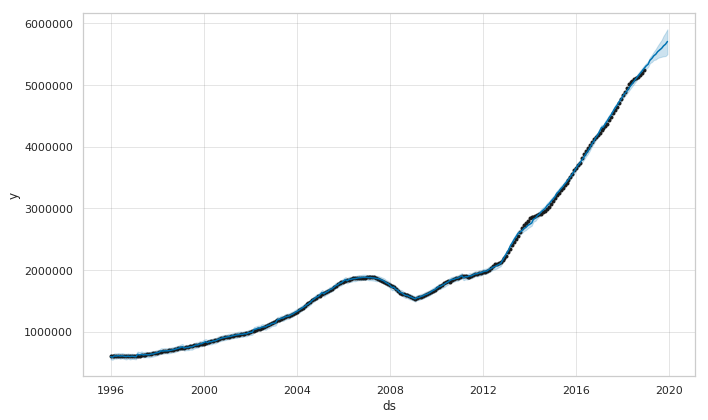

In [76]:
# Plot model with forecast trend values and uncertainty. 
m1.plot(forecast, uncertainty=True);

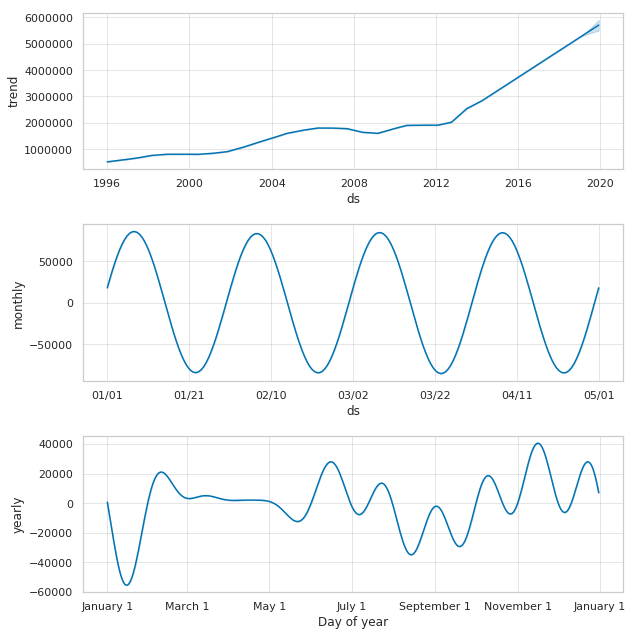

In [77]:
# Plot trend, yearly, and monthly seasonilities.
m1.plot_components(forecast);

In [78]:
# Calculate MAE, MSE, and R-squared. 
mae_prophet = mean_absolute_error(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat)
mse_prophet = mean_squared_error(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat)
r2_prophet = r2_score(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat)

# Print metrics
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae_prophet, 2)))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_prophet, 2)))
print('The R-squared of our forecasts is {}'.format(round(r2_prophet, 2)))

The Mean Absolute Error of our forecasts is 123593.17
The Mean Squared Error of our forecasts is 16877268088.49
The R-squared of our forecasts is -0.11


In [79]:
# Calculate MAE, MSE, and R-squared with the lower CI. 
mae_prophet = mean_absolute_error(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat_lower)
mse_prophet = mean_squared_error(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat_lower)
r2_prophet = r2_score(sm_test.value, forecast[forecast['ds']>='2019-01-01'].yhat_lower)

# Print metrics
print('The Mean Absolute Error of our lower CI forecasts is {}'.format(round(mae_prophet, 2)))
print('The Mean Squared Error of our lower CI forecasts is {}'.format(round(mse_prophet, 2)))
print('The R-squared of our lower CI forecasts is {}'.format(round(r2_prophet, 2)))

The Mean Absolute Error of our lower CI forecasts is 65346.61
The Mean Squared Error of our lower CI forecasts is 5755875401.23
The R-squared of our lower CI forecasts is 0.62


## Model Evaluation and Summary
***

In [80]:
states_focused = ['CA', 'DC', 'NV', 'IN', 'AZ', 'FL']

df_data_pivot2 = df_data_pivot[df_data_pivot.State.isin(states_focused)]

In [ ]:
# df_data_pivot2.tail()

In [82]:
# Select train and test sets. 
train = df_data_pivot2[(df_data_pivot2['date'] >= '2010-01-01') & (df_data_pivot2['date'] <= '2018-12-01')]
test = df_data_pivot2[df_data_pivot2['date']>='2019-01-01']

# Keep date, value, and RegionName; rename to ds, y, and zipcode. 
to_keep = ['date', 'value', 'State', 'RegionName']
train = train[to_keep]
train.columns = ['ds', 'y', 'State', 'zipcode']
test = test[to_keep]
test.columns = ['ds', 'y', 'State', 'zipcode']

In [83]:
train_pivot = train.pivot(index='ds', columns='zipcode', values='y')
test_pivot = test.pivot(index='ds', columns='zipcode', values='y')

In [84]:
# Build function that creates Prophet model
def prophet_train(data):
    """
    Creates a forecast based on the inputted zipcode.
    1. Filters the zipcode from the train set
    2. Builds the model
    3. Runs the model
    4. Creates a list of the next 12 months and produces a forecast for said months
    5. Appends zipcode for identification
    """   
    
    model = Prophet(interval_width=.95, changepoint_prior_scale=6, yearly_seasonality=True, 
             seasonality_prior_scale=1, weekly_seasonality=False, daily_seasonality=False)
    model.add_seasonality(name='monthly', period=120, fourier_order=4)
    
    model.fit(data)
    
    future_dates = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(future_dates)
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    results = forecast[forecast['ds']>='2019-01-01']
    return(results)

In [86]:
s1 = datetime.datetime.now()
print ("Start date and time:", s1.strftime("%Y-%m-%d %H:%M:%S"))

import prophet_train

starttime = time.time()
zipcodes = train.zipcode.unique()
forecasts = []
num = 1

for i in zipcodes: 
    data = train[train['zipcode']==i]
    result = prophet_train.prophet_train(data)
    result = result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    result['zipcode'] = i 
    forecasts.append(result)
    if len(zipcodes) % num == 0:
       print("{} percent completed".format(np.round(num/len(zipcodes) * 100), 2))
    num += 1
    
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

s2 = datetime.datetime.now()
print ("End date and time:", s2.strftime("%Y-%m-%d %H:%M:%S"))

Start date and time: 2021-05-16 01:48:03
0.0 percent completed
0.0 percent completed
0.0 percent completed
0.0 percent completed
1.0 percent completed
1.0 percent completed
1.0 percent completed
2.0 percent completed
2.0 percent completed
4.0 percent completed
5.0 percent completed
11.0 percent completed
14.0 percent completed
33.0 percent completed
100.0 percent completed
...runtime: 178.37 minutes
End date and time: 2021-05-16 04:46:25


In [87]:
### Converts the results from the previous block to csv. This csv will be imported in the next block, while this block is commented out. 
## Initiate empty data frame
zipcodes2 = train.zipcode.unique()

train_results = pd.DataFrame()

## Iterate over the zipcodes and append them to the corresponding forecasts. 
for i in range(0, len(zipcodes2)):
    result = forecasts[i]
    result['zipcode'] = zipcodes2[i]
    train_results = pd.concat([train_results, result], axis=0, ignore_index=True)
               
# Convert train_results to dataframe and export to csv        
train_results = pd.DataFrame(train_results)
train_results.to_csv('train_results.csv', index=False)

In [ ]:
# Load csv with forecasted results
train_results = pd.read_csv('train_results.csv', index_col=False)

# Convert ds to datetime and zipcode to object to merge with the test results. 
train_results['ds'] = pd.to_datetime(train_results['ds'])
train_results['zipcode'] = train_results.zipcode.astype(object)
# train_results.head()

In [89]:
# Merge forecasts with test set.
forecast_results = test.merge(train_results, on=['ds', 'zipcode'], how='left').drop_duplicates()

# Obtain unique zipcodes to filter and obtain MAE and R-squared for each forecast
zc = forecast_results.zipcode.unique()

# Initiate empty array to store results
evaluation_results = pd.DataFrame()

# Iterate over every zipcode, calculate MAE, R-Squared, and percentage change in forecasted value
for i in zc: 
    data = forecast_results[forecast_results['zipcode']==i].reset_index()
    mae = mean_absolute_error(data.y, data.yhat)
    rsq = r2_score(data.y, data.yhat)
    first_value = data.iloc[0, 5]
    last_value = data.iloc[-1, 5]
    pct_change = np.round(((last_value/first_value) - 1) * 100, 2)
    data_evaluation = pd.DataFrame({'zipcode':i, 'MAE':mae, 'R2':rsq, 'Pct_change':pct_change}, index=[0])
    evaluation_results = pd.concat([evaluation_results, data_evaluation], axis=0, ignore_index=True)

In [90]:
# Print first rows of evaluation_results to check that the data was calculated correctly
evaluation_results.head()

,MAE,Pct_change,R2,zipcode
0,3167.603278,-4.47,-34.500037,4956
1,8343.748634,-2.09,-0.979198,7961
2,16094.093448,6.39,-7.996225,20001
3,21969.840190,7.28,-64.628050,20002
4,13713.333741,5.00,-7.595141,20003


/usr/local/envs/py3env/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


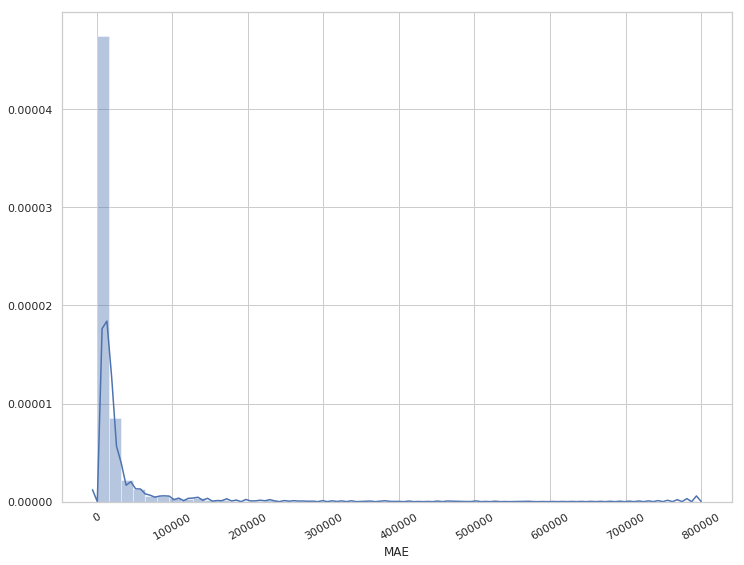

In [117]:
# Enlarge the plot

plt.figure(figsize=(12,9))

sns.distplot(evaluation_results.MAE)
# Rotate x-labels
plt.xticks(rotation=30)
plt.show()

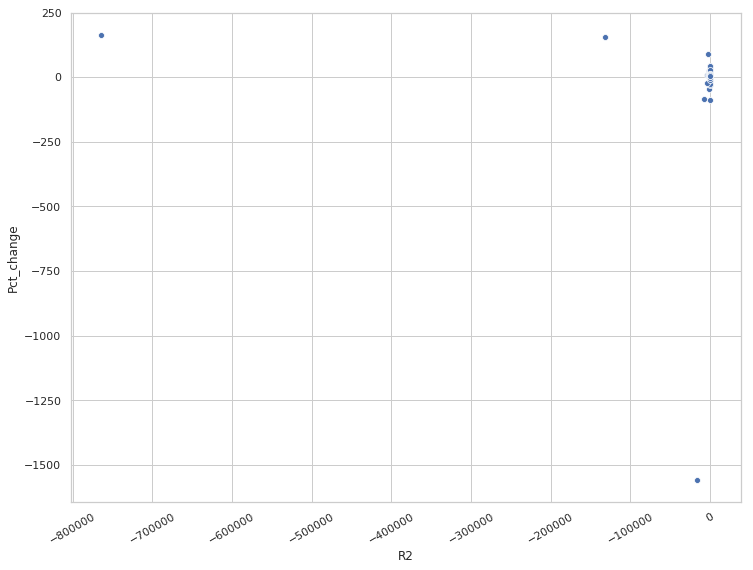

In [118]:
# Enlarge the plot

plt.figure(figsize=(12,9))
sns.scatterplot(x='R2', y='Pct_change', data=evaluation_results)

# Rotate x-labels
plt.xticks(rotation=30)
plt.show()

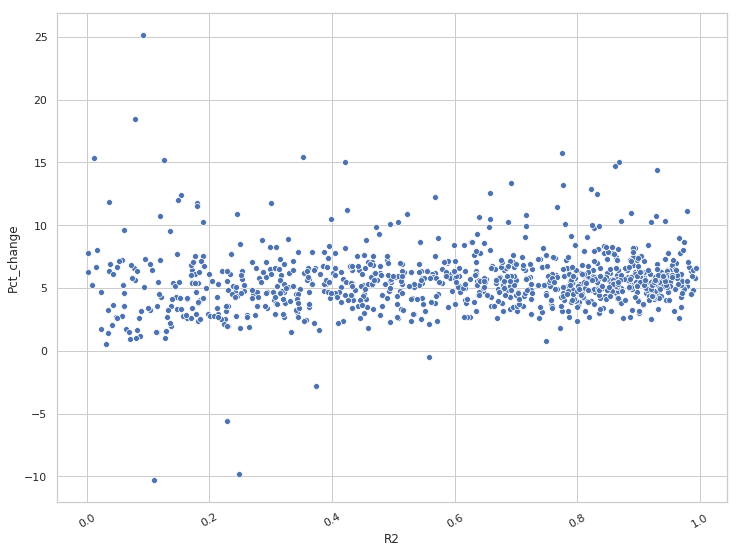

There are 3969 zipcodes in the original data
Now we're limiting to 943 zipcodes


In [119]:
# Limit the data to R-squared greater than or equal to zero 
limit_results = evaluation_results[evaluation_results['R2']>=0]

# Enlarge the plot
plt.figure(figsize=(12,9))
sns.scatterplot(x='R2', y='Pct_change', data=limit_results)
# Rotate x-labels
plt.xticks(rotation=30)
plt.show()

# How many models are we losing?
print("There are {} zipcodes in the original data".format(len(evaluation_results)))
print("Now we're limiting to {} zipcodes".format(len(limit_results)))

In [94]:
# Calculate high risk - low reward and low risk - high reward
hr_lr = limit_results.groupby(['R2', 'Pct_change'])[['zipcode', 'R2', 'Pct_change']].min().iloc[0]
lr_hr = limit_results.groupby(['R2', 'Pct_change'])[['zipcode', 'R2', 'Pct_change']].max().iloc[-1]
print(hr_lr)
print(lr_hr)

zipcode       86332.000000
R2                0.001461
Pct_change        6.270000
Name: (0.001460612368360592, 6.27), dtype: float64
zipcode       47971.00000
R2                0.99301
Pct_change        6.62000
Name: (0.9930101854267513, 6.62), dtype: float64


In [103]:
# Calculate high risk - high reward and low risk - low reward
hr_hr = limit_results[limit_results['Pct_change']>=0].groupby('R2')['zipcode', 'Pct_change'].min().sort_values('Pct_change')
lr_lr = limit_results[limit_results['Pct_change']>=0].groupby('R2')['zipcode', 'Pct_change'].max().sort_values('Pct_change', ascending=False)
print(hr_hr.head(20))
print(lr_lr.head())

          zipcode  Pct_change
R2                           
0.032022    20036        0.54
0.748971    96034        0.74
0.070685    95835        0.92
0.080908    93531        0.98
0.127473    33865        1.04
0.087530    85501        1.20
0.035311    95693        1.40
0.115286    32424        1.47
0.332167    47804        1.49
0.068737    95680        1.49
0.112318    34275        1.52
0.128911    85920        1.60
0.081448    32044        1.67
0.378055    92270        1.68
0.063743    34240        1.71
0.022591    95722        1.77
0.249180    34293        1.78
0.770996    33433        1.82
0.458913    92253        1.83
0.263678    95975        1.91
          zipcode  Pct_change
R2                           
0.092382    85172       25.15
0.077906    46201       18.45
0.774649    46102       15.73
0.352285    46327       15.42
0.011625    33438       15.32


In [ ]:
# Obtain the four markets by risk-reward
zipcodes_final = [86332, 47971,85172,96034]
cities = df_data_pivot[df_data_pivot.RegionName.isin(zipcodes_final)][['RegionName', 'City', 'State', 'Metro', 'CountyName']].drop_duplicates()
# cities

In [105]:
# Obtain the top three best investment markets zipcodes
best_three = limit_results.groupby(['R2', 'Pct_change'])[['zipcode']].max().reset_index()
best_three = best_three.sort_values(['R2', 'Pct_change'], ascending=False)
best_three_array = np.asarray(best_three.iloc[0:3, 2])

# Filter the zipcodes from df_data_pivot
best_cities = df_data_pivot[df_data_pivot.RegionName.isin(best_three_array)][['RegionName', 'City', 'State', 'Metro', 'CountyName']].drop_duplicates()
best_cities.merge(best_three, left_on='RegionName', right_on='zipcode', how='left').sort_values('Pct_change', ascending=False)

,RegionName,City,State,Metro,CountyName,R2,Pct_change,zipcode
2,47971,Oxford,IN,Lafayette-West Lafayette,Benton County,0.993010,6.62,47971
0,46065,Rossville,IN,Frankfort,Clinton County,0.991205,5.78,46065
1,46962,North Manchester,IN,Wabash,Wabash County,0.990880,5.77,46962


## Summary and Conclusion
***

* OMG! - Yes, thats how I feel now. It started as a simple exercise with less data sources.However, the complexity was in the form of having 300+ temporal data at city, state, county, metro and zipcode level on all 50 US States.
* After relatively simpe Observe, Scrub processes; exploratotry involved slicing data by metro level, state level, percentage of increase over time. There was a time between 2008 to 2012 the market was real down ( recession) - the housing was seen sharp fall in price. However, from 2009 onwards the overall pricing has been on a steady rise. Intrestingly, Indiana, Florida and Arizona had best runs considering the growth percentage from 1996. We have alos looked at Florida to understand how the pricing has been over period of time. Comparing the real estate in 1996 vs 2019; Wauchulla, Lake Ciry and Miami-Fort Laurerdale-West Palm Beach had seen higher percentage of growth ( >200%).
* Modeling - Its more of tug of war on the compute resource vs modeling. I almost ran into 3 differnt environments, Jupyter Notebook on Local Mac book (~16GB RAM), IBM Watson Studio and finally GCP Datalab isntance with 64vCPUs,416 GB memory. On the modeling, It stated with understanding the autocorrelation to find the best lag for the model.Based on the initial model ,ran the prediction on the training data set using SARIMAX algortithm; Model has returned and R-Squared of 0.99, MAE as 8495.62 and Mean Squared Error as 121380932. Yes, its still using the training set - so, cant be excited about the R^2 value.
* Then, built a prophet model with 95% confidence interval with monthly & yearly seasonality. This model had R^2 as -0.11 showing strong relationship between actual and predicted values but with the value being negative, we can consider this as well.MAE and Mean Squared Error having high values as well.
* Next prophet model was run with > 2019 values with lower Confidence interval, R^2 value was at 0.62. Comparatively better than the earlier model.
* Now, its time to run the prophet model for the entire dataset,It took about 3 hours to complete with 'CA', 'DC', 'NV', 'IN', 'AZ', 'FL' states in selection.In addition, the process was run with different scenarios based on the R^2, Percent Change by Zipcode across 2010 to 2020.
  * High Risk - High Reward
  * Low Risk - Low Reward
  * Low Risk - High Reward
  * High Risk - Low Reward
* Based on various scenarios, below are the recommendations for Syracuse Real Estate Investment Trust to invest. These may look high reward investements for SREIT.

  #### Low Risk - High Reward
    * Oxford, IN from Benton County around Lafayette-West Lafayette Metro with R^2 0.99 and Percent Change 6.62
    * Rossville, IN from Clinton County around Frankfort Metro with R^2 0.99 and Percent Change 5.78   | 
    * North Manchester,IN from Wabash County around Wabash Metro with R^2 0.99 and Percent Change 5.71

## Next Steps
***

* This process was run on a GCP Datalab instance with Machine type n1-highmem-64 (64 vCPUs, 416 GB memory). However, It was taking more than 6 hours to complete for 8 states combined.Often with session issues, the code had to be executed mutilple times. Eventually, I had decided to reduce the number of states and duration starting 2010 to run the final prediction. This itself took ~180 minutes. So, for future work, I would try to run this on a GPU instance with higher compute. Definitly, with higher compute, will be able to include all the states from 1996 to run the predictions.

* I have also learned about Interactive choropleath maps using geoplot, geopandas libraries and geoJSON and Shape files. However, this would be integrated in our final project. 

#### Appendix

In [107]:
# Filter the zipcodes from df_data_pivot

top_20_array = np.asarray(best_three.iloc[0:20, 2])

best_20_cities = df_data_pivot[df_data_pivot.RegionName.isin(top_20_array)][['RegionName', 'City', 'State', 'Metro', 'CountyName']].drop_duplicates()
best_20_cities = best_20_cities.merge(best_three, left_on='RegionName', right_on='zipcode', how='left').sort_values('Pct_change', ascending=False)

In [ ]:
best_20_cities.reset_index(drop=True, inplace=True)
best_20_cities = best_20_cities[['City', 'State', 'Metro','zipcode', 'CountyName','R2','Pct_change']]
# best_20_cities

[Text(0,0.5,'City'), Text(0.5,0,'% Rate')]

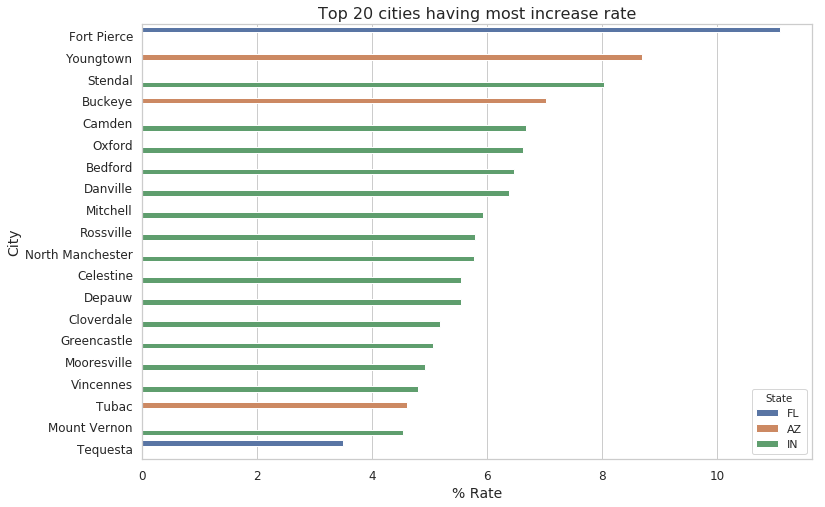

In [109]:
plt.figure(figsize= (12,8))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Total cases",fontsize = 14)
plt.ylabel('City',fontsize = 14)
plt.title("Top 20 cities having most increase rate" , fontsize = 16)
ax = sns.barplot(x = best_20_cities['Pct_change'], y = best_20_cities.City,hue = best_20_cities.State)
ax.set(xlabel='% Rate', ylabel='City')

/usr/local/envs/py3env/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


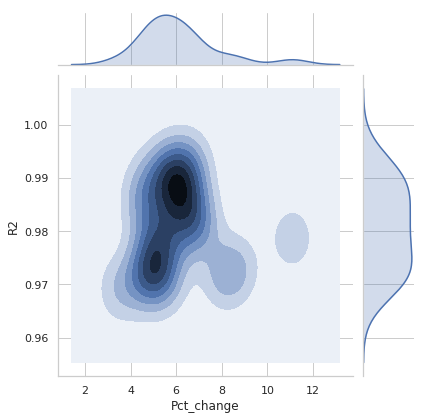

In [121]:
# Enlarge the plot
plt.figure(figsize=(15,12))

sns.jointplot(
    data=best_20_cities,
    x=best_20_cities['Pct_change'], y=best_20_cities['R2'], hue=best_20_cities.State,
    kind="kde"
)

## References
***

1.  https://www.fortunebuilders.com/syracuse-ny-real-estate-market-trends-2016/
2.  https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
3.  http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv
4.  https://www.dol.gov/owcp/regs/feeschedule/fee/fee11/fs11_gpci_by_msa-zip.xls
5.  https://stackoverflow.com/questions/60145006/cannot-import-name-easter-from-holidayshttps://stackoverflow.com/questions/60145006/cannot-import-name-easter-from-holidays
6.  https://anaconda.org/conda-forge/fbprophet
7.  https://www.rate.com/research/fort_pierce-fl-34950/market-trends
8.  https://www.rate.com/research/youngtown-az-85363
9.  https://www.rate.com/research/oxford-in-47971
10.  https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
11. https://www.python-graph-gallery.com/choropleth-map-geopandas-python



***
